# Initiating pyspark session

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.5.4/spark-3.5.4-bin-hadoop3-scala2.13.tgz
!tar xf spark-3.5.4-bin-hadoop3-scala2.13.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.4-bin-hadoop3-scala2.13"

import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Big Data Assignment") \
    .getOrCreate()


In [ ]:
employee_df = spark.read.csv('/content/Employee_dataset.csv', header=True, inferSchema=True)
salary_df = spark.read.csv('/content/Employee_salaries.csv', header=True, inferSchema=True)

# Task 1: Perform Data Cleaning

In [ ]:
from pyspark.sql.functions import col, isnan
from functools import reduce

In [ ]:
print(employee_df.show())
print(employee_df.printSchema())
print(employee_df.count())

+----------------+---------+--------------+-----------+----------+---------+---------------+---------------+
|           jobId|companyId|       jobRole|  education|     major| industry|yearsExperience|distanceFromCBD|
+----------------+---------+--------------+-----------+----------+---------+---------------+---------------+
|JOB1362684407687|   COMP37|           CFO|    MASTERS|      MATH|   HEALTH|             10|             83|
|JOB1362684407688|   COMP19|           CEO|HIGH_SCHOOL|      NONE|      WEB|              3|             73|
|            NULL|     NULL|          NULL|       NULL|      NULL|     NULL|           NULL|           NULL|
|            NULL|     NULL|          NULL|       NULL|      NULL|     NULL|           NULL|           NULL|
|            NULL|     NULL|          NULL|       NULL|      NULL|     NULL|           NULL|           NULL|
|            NULL|     NULL|          NULL|       NULL|      NULL|     NULL|           NULL|           NULL|
|            NULL| 

- .show() shows the preview of the employee dataset.<br>
- .printSchema() shows the data type of each column/feature in the employee dataset allowing me to make changes if necessary.<br>
- .count() shows the number of row entries in the employee dataset.

In [ ]:
print(salary_df.show())
print(salary_df.printSchema())
print(salary_df.count())

+----------------+-----------------+
|           jobId|salaryInThousands|
+----------------+-----------------+
|JOB1362684407687|              130|
|JOB1362684407688|              101|
|JOB1362684407689|              137|
|JOB1362684407690|              142|
|JOB1362684407691|              163|
|JOB1362684407692|              113|
|            NULL|             NULL|
|            NULL|             NULL|
|            NULL|             NULL|
|            NULL|             NULL|
|JOB1362684407697|              102|
|JOB1362684407698|              144|
|JOB1362684407699|               79|
|JOB1362684407700|              193|
|JOB1362684407701|               47|
|JOB1362684407702|              172|
|JOB1362684407703|               47|
|JOB1362684407704|              126|
|JOB1362684407705|              122|
|JOB1362684407706|               95|
+----------------+-----------------+
only showing top 20 rows

None
root
 |-- jobId: string (nullable = true)
 |-- salaryInThousands: integer (nullab

- .show() shows the preview of the employee salary dataset.<br>
- .printSchema() shows the data type of each column/feature in the employee salary dataset allowing me to make changes if necessary.<br>
- .count() shows the number of row entries in the employee salary dataset.

## Removing Duplicates

In [ ]:
employee_duplicate_count = employee_df.count() - employee_df.dropDuplicates().count()
print(f"Number of duplicate rows in employee dataset: {employee_duplicate_count}")

salary_duplicate_count = salary_df.count() - salary_df.dropDuplicates().count()
print(f"Number of duplicate rows in salary dataset: {salary_duplicate_count}")

Number of duplicate rows in employee dataset: 54
Number of duplicate rows in salary dataset: 222


This allows me to see how many rows are duplicated in each dataset. So when I drop the duplicated rows, I know how many rows that are expected to be left. Ensuring that there are no inconsistencies or mistakes.

In [ ]:
employee_df_cleaned = employee_df.dropDuplicates()
salary_df_cleaned = salary_df.dropDuplicates()
print(f"Total number of rows in employee dataset: {employee_df_cleaned.count()}")
print(f"Total number of rows in salary dataset: {salary_df_cleaned.count()}")

Total number of rows in employee dataset: 999946
Total number of rows in salary dataset: 999778


Dropping the duplicate rows and displaying the total number of rows after dropping.

## Irrelevant Observations and Structural Errors

In [ ]:
print(employee_df_cleaned.select('jobRole').distinct().show())
print(employee_df_cleaned.select('education').distinct().show())
print(employee_df_cleaned.select('major').distinct().show())
print(employee_df_cleaned.select('industry').distinct().show())

+--------------+
|       jobRole|
+--------------+
|           CTO|
|        JUNIOR|
|       JANITOR|
|           CFO|
|           CEO|
|       MANAGER|
|VICE_PRESIDENT|
|        SENIOR|
|     PRESIDENT|
|          NULL|
+--------------+

None
+-----------+
|  education|
+-----------+
|  BACHELORS|
|    MASTERS|
|       NONE|
|HIGH_SCHOOL|
|   DOCTORAL|
|       NULL|
+-----------+

None
+-----------+
|      major|
+-----------+
|    BIOLOGY|
|ENGINEERING|
|    PHYSICS|
|  CHEMISTRY|
|   BUSINESS|
|       MATH|
|    COMPSCI|
| LITERATURE|
|       NONE|
|       NULL|
+-----------+

None
+----------+
|  industry|
+----------+
|   SERVICE|
|      AUTO|
|    HEALTH|
| EDUCATION|
|       WEB|
|       OIL|
|   FINANCE|
|GOVERNMENT|
|      NULL|
+----------+

None


Checking for any variables that are not suppose to be there and for spelling errors.

In [ ]:
# Convert all employee_df_cleaned names to lowercase
employee_df_cleaned = employee_df_cleaned.toDF(*[col_name.lower() for col_name in employee_df_cleaned.columns])
employee_df_cleaned.show(5)

+----------------+---------+-------+-----------+--------+--------+---------------+---------------+
|           jobid|companyid|jobrole|  education|   major|industry|yearsexperience|distancefromcbd|
+----------------+---------+-------+-----------+--------+--------+---------------+---------------+
|JOB1362684408130|   COMP33|MANAGER|HIGH_SCHOOL|    NONE|  HEALTH|              7|              5|
|JOB1362684408145|   COMP59|JANITOR|       NONE|    NONE|     OIL|              1|             18|
|JOB1362684408310|   COMP55|    CEO|HIGH_SCHOOL|    NONE|     OIL|             11|             15|
|JOB1362684408832|   COMP24| SENIOR|  BACHELORS|BUSINESS|  HEALTH|             16|             15|
|JOB1362684408856|   COMP11|JANITOR|HIGH_SCHOOL|    NONE| SERVICE|             22|             75|
+----------------+---------+-------+-----------+--------+--------+---------------+---------------+
only showing top 5 rows



In [ ]:
# Convert all salary_df_cleaned names to lowercase
salary_df_cleaned = salary_df_cleaned.toDF(*[col_name.lower() for col_name in salary_df_cleaned.columns])
salary_df_cleaned.show(5)

+----------------+-----------------+
|           jobid|salaryinthousands|
+----------------+-----------------+
|JOB1362684407700|              193|
|JOB1362684407706|               95|
|JOB1362684408001|              187|
|JOB1362684408299|              207|
|JOB1362684409240|               81|
+----------------+-----------------+
only showing top 5 rows



Changing all column headers to lowercase

## Handling Missing Data

In [ ]:
# Function to check for NULL or NaN
def is_null_or_nan(c):
    return col(c).isNull() | (col(c).cast("string") == "NaN")

# Filter rows in employee df where any column has NULL or NaN values
employee_null_nan_rows = employee_df_cleaned.filter(
    reduce(lambda a, b: a | b, (is_null_or_nan(c) for c in employee_df_cleaned.columns))
)
employee_null_nan_rows.show()
print("Number of NULL or NaN rows in employee_df_cleaned:", employee_null_nan_rows.count())

# Filter rows in salary df where any column has NULL or NaN values
salary_null_nan_rows = salary_df_cleaned.filter(
    reduce(lambda a, b: a | b, (is_null_or_nan(c) for c in salary_df_cleaned.columns))
)
salary_null_nan_rows.show()
print("Number of NULL or NaN rows in salary_df_cleaned:", salary_null_nan_rows.count())

+----------------+---------+--------------+-----------+-----------+---------+---------------+---------------+
|           jobid|companyid|       jobrole|  education|      major| industry|yearsexperience|distancefromcbd|
+----------------+---------+--------------+-----------+-----------+---------+---------------+---------------+
|JOB1362684876339|   COMP59|VICE_PRESIDENT|       NULL|       NULL|     NULL|           NULL|             24|
|JOB1362684407809|   COMP46|       JANITOR|       NONE|       NULL|     NULL|           NULL|           NULL|
|JOB1362684876301|   COMP44|          NULL|       NULL|       NULL|     NULL|           NULL|              9|
|JOB1362684828710|   COMP31|           CFO|       NULL|       NULL|     NULL|           NULL|           NULL|
|            NULL|     NULL|       JANITOR|       NULL|       NULL|     NULL|             22|              1|
|JOB1362684876539|   COMP22|        JUNIOR|       NULL|       NULL|     NULL|           NULL|           NULL|
|         

Checking each row within all columns of both datasets for NULL and NaN data entries, printing out the rows with NULL and NaN to see if it has been filtered correctly as well as the number of rows that have been filtered out so that I am able to check after dropping whether the correct number of rows have been dropped.

In [ ]:
# Drop rows in employee df where any column has NULL or NaN values
employee_df_cleaned = employee_df_cleaned.na.drop("any")

# Drop rows in salary df where any column has NULL or NaN values
salary_df_cleaned = salary_df_cleaned.na.drop("any")

# See if the number of rows after dropping is consistent
print("Number of rows left in employee_df_cleaned:", employee_df_cleaned.count())
print("Number of rows left in salary_df_cleaned:", salary_df_cleaned.count())

Number of rows left in employee_df_cleaned: 999699
Number of rows left in salary_df_cleaned: 999771


Dropping all rows that have NULL values in any columns and printing the count of each dataset so ensure that the correct number of rows have been dropped. I decided to drop because compared to the size of the dataset, the number of rows dropped wouldn't significantly impact the quality of the dataset.

## Fix Unwanted Outliers using IQR method

In [ ]:
# Calculate Q1, Q3, and IQR for the column "yearsexperience"
q1, q3 = employee_df_cleaned.approxQuantile("yearsexperience", [0.25, 0.75], 0.01)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers
outliers = employee_df_cleaned.filter((col("yearsexperience") < lower_bound) | (col("yearsexperience") > upper_bound))
outliers.show()

# Non-outlier data
employee_df_cleaned = employee_df_cleaned.filter((col("yearsexperience") >= lower_bound) & (col("yearsexperience") <= upper_bound))
employee_df_cleaned.show()

+-----+---------+-------+---------+-----+--------+---------------+---------------+
|jobid|companyid|jobrole|education|major|industry|yearsexperience|distancefromcbd|
+-----+---------+-------+---------+-----+--------+---------------+---------------+
+-----+---------+-------+---------+-----+--------+---------------+---------------+

+----------------+---------+--------------+-----------+-----------+--------+---------------+---------------+
|           jobid|companyid|       jobrole|  education|      major|industry|yearsexperience|distancefromcbd|
+----------------+---------+--------------+-----------+-----------+--------+---------------+---------------+
|JOB1362684408130|   COMP33|       MANAGER|HIGH_SCHOOL|       NONE|  HEALTH|              7|              5|
|JOB1362684408145|   COMP59|       JANITOR|       NONE|       NONE|     OIL|              1|             18|
|JOB1362684408310|   COMP55|           CEO|HIGH_SCHOOL|       NONE|     OIL|             11|             15|
|JOB136268440

In [ ]:
employee_df_cleaned.count()

999699

Using the IQR method, it can be seen that no outliers were detected witin the column 'yearsExperience'. Meaning the data is consistent and no values fell outside the defined thresholds for outliers. Defined thresholds include below Q1 − 1.5 × IQR or above Q3 + 1.5 × IQR.

In [ ]:
# Calculate Q1, Q3, and IQR for the column "distancefromcbd"
q1, q3 = employee_df_cleaned.approxQuantile("distancefromcbd", [0.25, 0.75], 0.01)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers
outliers = employee_df_cleaned.filter((col("distancefromcbd") < lower_bound) | (col("distancefromcbd") > upper_bound))
outliers.show()

# Non-outlier data
employee_df_cleaned = employee_df_cleaned.filter((col("distancefromcbd") >= lower_bound) & (col("distancefromcbd") <= upper_bound))
employee_df_cleaned.show()

+----------------+---------+-------+---------+-----+--------+---------------+---------------+
|           jobid|companyid|jobrole|education|major|industry|yearsexperience|distancefromcbd|
+----------------+---------+-------+---------+-----+--------+---------------+---------------+
|JOB1362684407917|   COMP58|JANITOR| DOCTORAL| MATH| FINANCE|              1|            400|
|JOB1362685358867|    COMP9|JANITOR|  MASTERS| NONE|  HEALTH|              1|            500|
+----------------+---------+-------+---------+-----+--------+---------------+---------------+

+----------------+---------+--------------+-----------+-----------+--------+---------------+---------------+
|           jobid|companyid|       jobrole|  education|      major|industry|yearsexperience|distancefromcbd|
+----------------+---------+--------------+-----------+-----------+--------+---------------+---------------+
|JOB1362684408130|   COMP33|       MANAGER|HIGH_SCHOOL|       NONE|  HEALTH|              7|              5|

In [ ]:
employee_df_cleaned.count()

999697

Using the IQR method, it can be seen that there are 2 outliers were detected witin the column 'distanceFromCBD'. Meaning the data is fairly consistent and only had 2 values fell outside the defined thresholds for outliers. Defined thresholds include below Q1 − 1.5 × IQR or above Q3 + 1.5 × IQR.

In [ ]:
# Calculate Q1, Q3, and IQR for the column "salaryinthousands"
q1, q3 = salary_df_cleaned.approxQuantile("salaryinthousands", [0.25, 0.75], 0.01)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers
outliers = salary_df_cleaned.filter((col("salaryinthousands") < lower_bound) | (col("salaryinthousands") > upper_bound))
outliers.show()
print(outliers.count())

# Non-outlier data
salary_df_cleaned = salary_df_cleaned.filter((col("salaryinthousands") >= lower_bound) & (col("salaryinthousands") <= upper_bound))
salary_df_cleaned.show()

+----------------+-----------------+
|           jobid|salaryinthousands|
+----------------+-----------------+
|JOB1362684437341|              239|
|JOB1362684451788|              231|
|JOB1362684465580|              224|
|JOB1362684500012|              263|
|JOB1362684520033|              237|
|JOB1362684578427|              236|
|JOB1362684618130|              224|
|JOB1362684640519|              243|
|JOB1362684683546|              222|
|JOB1362684712359|              224|
|JOB1362684758899|              255|
|JOB1362684763844|              222|
|JOB1362684771739|              221|
|JOB1362684777900|              232|
|JOB1362684782777|              240|
|JOB1362684933951|              225|
|JOB1362684936894|              220|
|JOB1362684938330|              238|
|JOB1362684553460|              223|
|JOB1362684597672|              221|
+----------------+-----------------+
only showing top 20 rows

7579
+----------------+-----------------+
|           jobid|salaryinthousands|
+------

In [ ]:
no_salary_df = salary_df_cleaned.filter(salary_df_cleaned["salaryinthousands"] == 1000000)
no_salary_df.show(no_salary_df.count(), False)

+-----+-----------------+
|jobid|salaryinthousands|
+-----+-----------------+
+-----+-----------------+



Using the IQR method, it can be seen that there are quite a few outliers were detected witin the column 'salaryinthousands'. Meaning the data is somewhat consistent and only had 2 values fell outside the defined thresholds for outliers. Defined thresholds include below Q1 − 1.5 × IQR or above Q3 + 1.5 × IQR.

## Validate and Quality Assurance

In [ ]:
# Checking to see if duplicate rows have been removed
duplicate_count = employee_df_cleaned.count() - employee_df_cleaned.dropDuplicates().count()
print(f"Number of duplicate rows in cleaned employee dataset: {duplicate_count}")

duplicate_count = salary_df_cleaned.count() - salary_df_cleaned.dropDuplicates().count()
print(f"Number of duplicate rows in cleaned salary dataset: {duplicate_count}")

# Checking to see if any rows with NULL have been removed
# Filter rows in employee df where any column has NULL values
employee_null_nan_rows = employee_df_cleaned.filter(
    reduce(lambda a, b: a | b, (is_null_or_nan(c) for c in employee_df_cleaned.columns))
)
employee_null_nan_rows.show()

# Filter rows in salary df where any column has NULL values
salary_null_nan_rows = salary_df_cleaned.filter(
    reduce(lambda a, b: a | b, (is_null_or_nan(c) for c in salary_df_cleaned.columns))
)
salary_null_nan_rows.show()

# Confirm the number of rows is correct, employee_df_cleaned should have 999697 and salary_df_cleaned should have 992651
print(employee_df_cleaned.count())
print(salary_df_cleaned.count())

Number of duplicate rows in cleaned employee dataset: 0
Number of duplicate rows in cleaned salary dataset: 0
+-----+---------+-------+---------+-----+--------+---------------+---------------+
|jobid|companyid|jobrole|education|major|industry|yearsexperience|distancefromcbd|
+-----+---------+-------+---------+-----+--------+---------------+---------------+
+-----+---------+-------+---------+-----+--------+---------------+---------------+

+-----+-----------------+
|jobid|salaryinthousands|
+-----+-----------------+
+-----+-----------------+

999697
992192


Validating that all the necessary data cleaning steps were done properly. Checking that there are no duplicates and NULL rows in the cleaned dataset. Printing the row count to ensure that every process dropped the correct number of rows.

# Task 2: Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import functions as F
from pyspark.sql.functions import round
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Merging Datasets

In [ ]:
# Perform an inner join on the "jobid" column
merged_df = employee_df_cleaned.join(salary_df_cleaned, on="jobid", how="inner")
merged_df.show()
merged_df.count()

+----------------+---------+--------------+-----------+----------+---------+---------------+---------------+-----------------+
|           jobid|companyid|       jobrole|  education|     major| industry|yearsexperience|distancefromcbd|salaryinthousands|
+----------------+---------+--------------+-----------+----------+---------+---------------+---------------+-----------------+
|JOB1362684407687|   COMP37|           CFO|    MASTERS|      MATH|   HEALTH|             10|             83|              130|
|JOB1362684407688|   COMP19|           CEO|HIGH_SCHOOL|      NONE|      WEB|              3|             73|              101|
|JOB1362684407697|   COMP56|       JANITOR|HIGH_SCHOOL|      NONE|   HEALTH|             24|             30|              102|
|JOB1362684407700|   COMP54|        JUNIOR|    MASTERS|      MATH|  FINANCE|             21|             26|              193|
|JOB1362684407703|   COMP14|        JUNIOR|    MASTERS|   PHYSICS|  SERVICE|              1|             91|   

991894

Merging both datasets together to carry out the next tasks easier.

## Basic overview of merged dataset

In [ ]:
# Distribution of job roles
jobrole_counts = merged_df.groupBy("jobrole").count().orderBy("count", ascending=False).show()

+--------------+------+
|       jobrole| count|
+--------------+------+
|        SENIOR|125758|
|       JANITOR|124907|
|       MANAGER|124825|
|VICE_PRESIDENT|124499|
|        JUNIOR|124493|
|           CTO|123404|
|           CFO|122697|
|           CEO|121310|
|     PRESIDENT|     1|
+--------------+------+



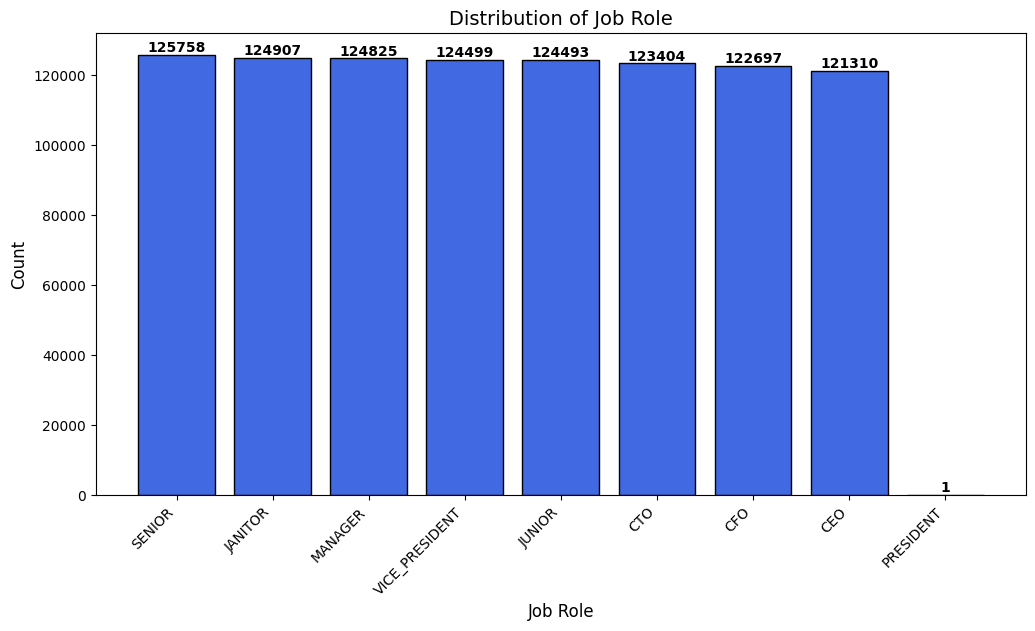

In [ ]:
# Aggregate job role counts and convert to Pandas
jobrole_counts = merged_df.groupBy("jobrole").count().orderBy("count", ascending=False).toPandas()

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(jobrole_counts["jobrole"], jobrole_counts["count"], color='royalblue', edgecolor='black')

# Add text labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize labels and title
plt.xlabel("Job Role", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Job Role", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

Visualises the distribution of job roles (numerically and graphically)

In [ ]:
education_counts = merged_df.groupBy("education").count().orderBy("count", ascending=False).show()

+-----------+------+
|  education| count|
+-----------+------+
|       NONE|236483|
|HIGH_SCHOOL|236479|
|  BACHELORS|173864|
|    MASTERS|172959|
|   DOCTORAL|172109|
+-----------+------+



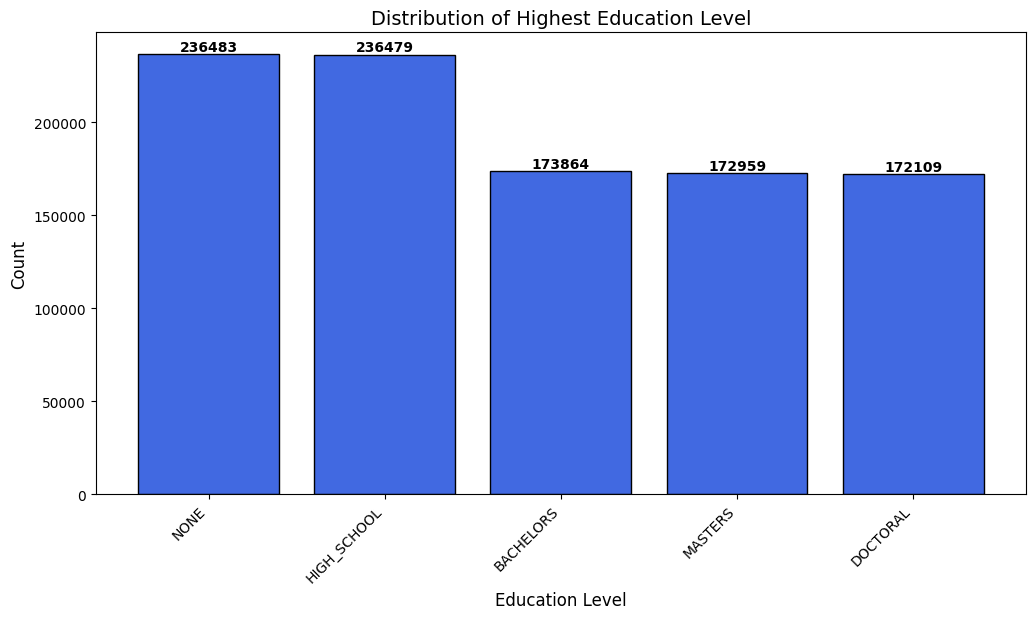

In [ ]:
# Aggregate job role counts and convert to Pandas
education_counts = merged_df.groupBy("education").count().orderBy("count", ascending=False).toPandas()

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(education_counts["education"], education_counts["count"], color='royalblue', edgecolor='black')

# Add text labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize labels and title
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Highest Education Level", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

Visualises the distribution of highest education level (numerically and graphically)

In [ ]:
major_counts = merged_df.groupBy("major").count().orderBy("count", ascending=False).show()

+-----------+------+
|      major| count|
+-----------+------+
|       NONE|531095|
| LITERATURE| 58269|
|  CHEMISTRY| 58232|
|    BIOLOGY| 57801|
|    PHYSICS| 57708|
|    COMPSCI| 57603|
|   BUSINESS| 57267|
|ENGINEERING| 57006|
|       MATH| 56913|
+-----------+------+



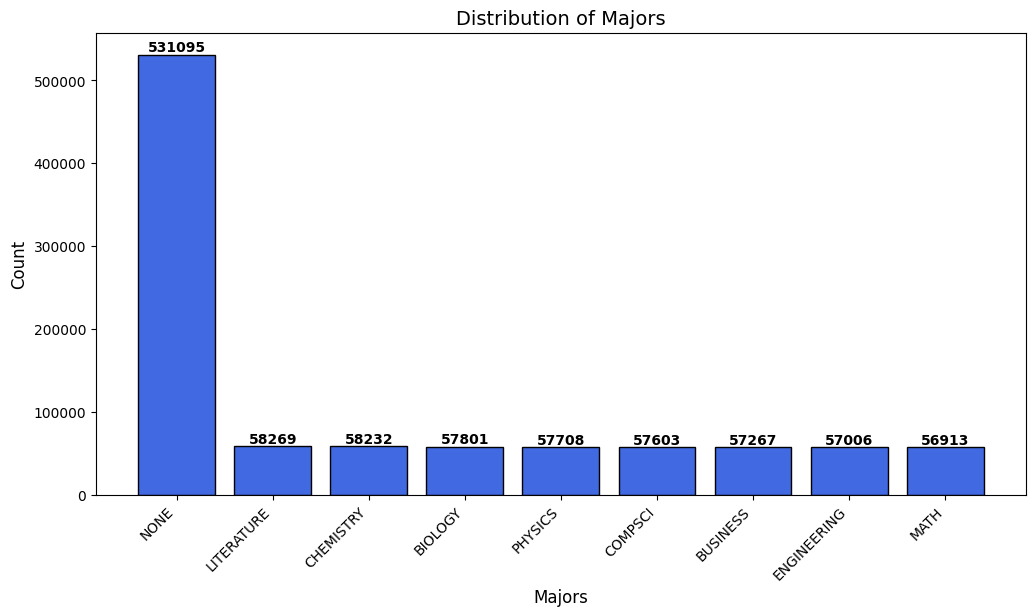

In [ ]:
# Aggregate job role counts and convert to Pandas
major_counts = merged_df.groupBy("major").count().orderBy("count", ascending=False).toPandas()

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(major_counts["major"], major_counts["count"], color='royalblue', edgecolor='black')

# Add text labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize labels and title
plt.xlabel("Majors", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Majors", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

Visualises the distribution of majors (numerically and graphically)

In [ ]:
industry_counts = merged_df.groupBy("industry").count().orderBy("count", ascending=False).show()

+----------+------+
|  industry| count|
+----------+------+
| EDUCATION|142615|
|      AUTO|142516|
|   SERVICE|142341|
|    HEALTH|142002|
|       WEB|141766|
|   FINANCE|140453|
|       OIL|140200|
|GOVERNMENT|     1|
+----------+------+



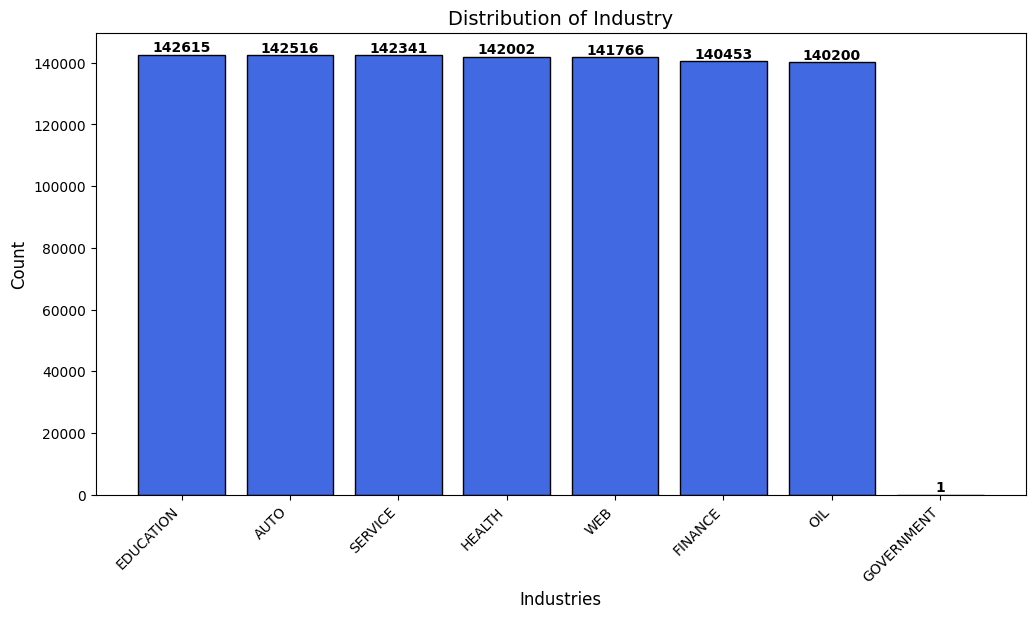

In [ ]:
# Aggregate job role counts and convert to Pandas
industry_counts = merged_df.groupBy("industry").count().orderBy("count", ascending=False).toPandas()

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(industry_counts["industry"], industry_counts["count"], color='royalblue', edgecolor='black')

# Add text labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize labels and title
plt.xlabel("Industries", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Industry", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

Visualises the distribution of industries (numerically and graphically)

## What is the JOBID that has the highest paying salary in the web industry?

In [ ]:
# Filter the data for the "web" industry
web_industry_df = merged_df.filter(merged_df['industry'] == 'WEB')

# Sort by salaryinthousands in descending order and select the first row
highest_salary_web = web_industry_df.orderBy(F.col('salaryinthousands').desc()).first()
highest_salary_web

Row(jobid='JOB1362684478946', companyid='COMP32', jobrole='CFO', education='BACHELORS', major='PHYSICS', industry='WEB', yearsexperience=23, distancefromcbd=2, salaryinthousands=219)

Jobid 'JOB1362684784883' has the highest paying salary in the web industry. Filter 'Industry' to only include 'WEB' and saves it as a variable 'web_industry_df'. Using this variable, it can sort 'salaryInThousands' from highest to lowest of all entries of 'WEB' industry, '.first()' only returns the first value, the output is saved as a variable 'highest_salary_web'. The jodID with the highest paying salary in the web industry is 'JOB1362684784883'.<br><br>
JOB1362684784883 is in one of the highest roles in their company, possessing the highest education qualification 'doctural', has a major and 2 decades worth of experience. All these could affect the salary.

## Rank the top 5 jobs role with the highest salary for all the industry?

In [ ]:
# Group by jobrole and calculate the average salary
top_roles_df = merged_df.groupBy("jobrole") \
    .agg(round(F.avg("salaryinthousands"), 2).alias("avg_salary")) \
    .orderBy(F.col("avg_salary").desc()) \
    .limit(5)
top_roles_df.show()

+--------------+----------+
|       jobrole|avg_salary|
+--------------+----------+
|           CEO|     142.8|
|           CTO|    134.23|
|           CFO|    134.19|
|VICE_PRESIDENT|     124.8|
|       MANAGER|    115.15|
+--------------+----------+



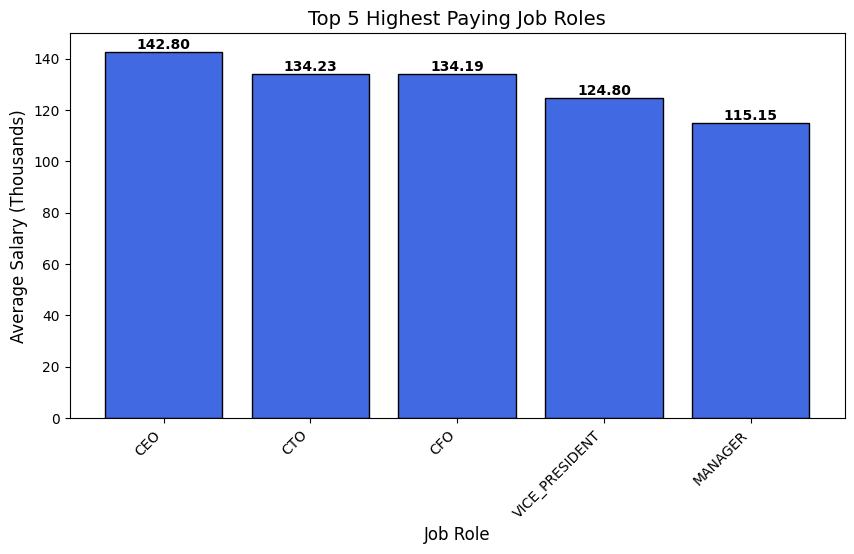

In [ ]:
# Convert to Pandas DataFrame
top_roles_pd = top_roles_df.toPandas()

# Create the bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(top_roles_pd["jobrole"], top_roles_pd["avg_salary"], color='royalblue', edgecolor='black')

# Add text labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels & Title
plt.xlabel("Job Role", fontsize=12)
plt.ylabel("Average Salary (Thousands)", fontsize=12)
plt.title("Top 5 Highest Paying Job Roles", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

This code aggregates all employees with the same job role together, calculates the average salary, rounds it off to 2 decimal place, sorts it in descending order, and shows the top 5 results. CEO has the highest salary for all the industries. Job roles that pay the highest are roles that are typically the higher/highest positions in any company as they take on more responsibility, require many years of experience and expertise. Higher-level roles have make strategic decisions to cater to the overall success of the company.

## Which industry has the highest average salary?

In [ ]:
# Group by industry and calculate the average salary
industry_avg_salary_df = merged_df.groupBy("industry") \
    .agg(round(F.avg("salaryinthousands"), 2).alias("avg_salary")) \
    .orderBy(F.col("avg_salary").desc())
industry_avg_salary_df.show()

+----------+----------+
|  industry|avg_salary|
+----------+----------+
|       OIL|    129.11|
|   FINANCE|    129.02|
|       WEB|    120.56|
|    HEALTH|    115.19|
|      AUTO|    109.13|
|   SERVICE|    104.26|
| EDUCATION|     99.34|
|GOVERNMENT|      81.0|
+----------+----------+



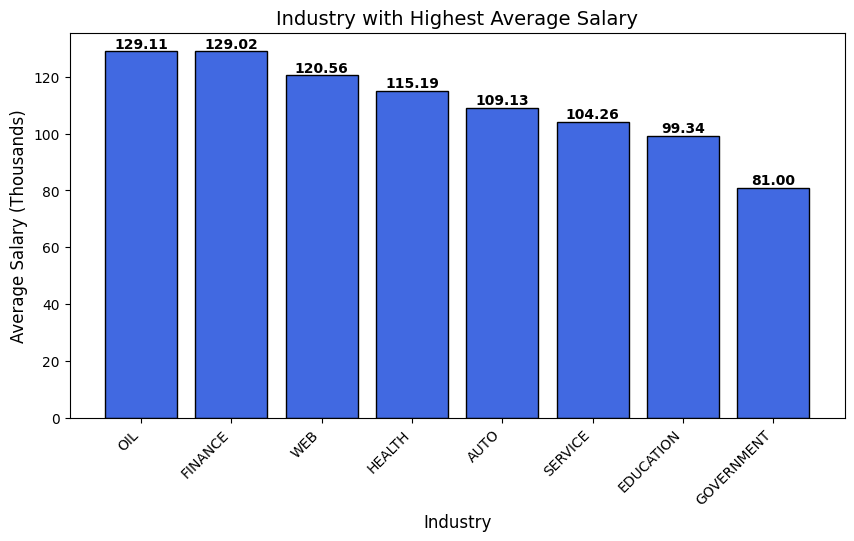

In [ ]:
industry_avg_salary_pd = industry_avg_salary_df.toPandas()

# Create the bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(industry_avg_salary_pd["industry"], industry_avg_salary_pd["avg_salary"], color='royalblue', edgecolor='black')

# Add text labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels & Title
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Average Salary (Thousands)", fontsize=12)
plt.title("Industry with Highest Average Salary", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

The oil industry has the highest average salary.<br>
This code aggregates all employees with the same industry together, calculates the average salary, rounds it off to 2 decimal place, and sorts it in descending order. The oil industry generates massive revenues, hence, companies have high profit margins and can afford to pay employees higher salaries. Working in the oil industry requires highly specialized skills and specialties, and years of experience which justifies high salaries. Jobs in the oil industry typically involve working in dangerous environments, employees are compensated with higher salaries associating with the risk of injury and environments.

## Which job role has the lowest pay?

In [ ]:
# Group by jobRole and calculate the average salary
lowest_paid_role_df = merged_df.groupBy("jobrole") \
    .agg(F.round(F.avg("salaryinthousands"), 2).alias("avg_salary")) \
    .orderBy(F.col("avg_salary").asc())

lowest_paid_role_df.show()

+--------------+----------+
|       jobrole|avg_salary|
+--------------+----------+
|       JANITOR|     70.81|
|     PRESIDENT|      81.0|
|        JUNIOR|     95.31|
|        SENIOR|    105.42|
|       MANAGER|    115.15|
|VICE_PRESIDENT|     124.8|
|           CFO|    134.19|
|           CTO|    134.23|
|           CEO|     142.8|
+--------------+----------+



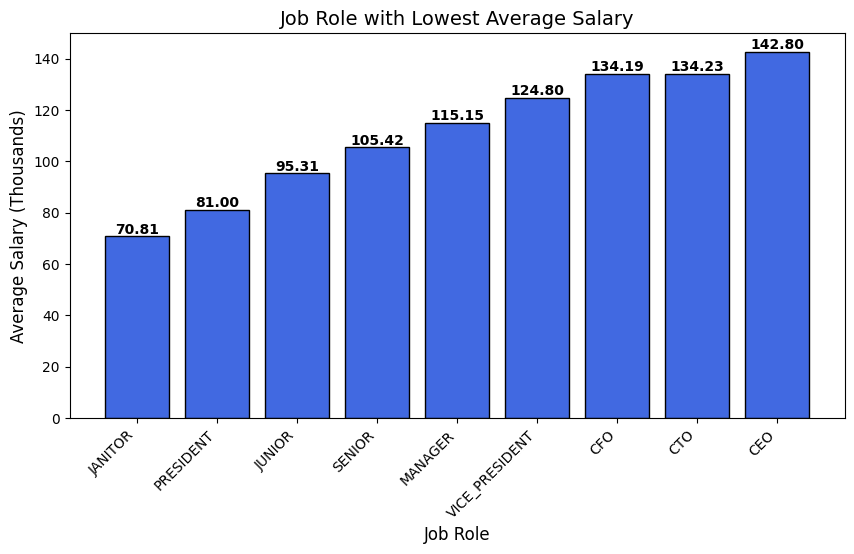

In [ ]:
lowest_paid_role_pd = lowest_paid_role_df.toPandas()

# Create the bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(lowest_paid_role_pd["jobrole"], lowest_paid_role_pd["avg_salary"], color='royalblue', edgecolor='black')

# Add text labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels & Title
plt.xlabel("Job Role", fontsize=12)
plt.ylabel("Average Salary (Thousands)", fontsize=12)
plt.title("Job Role with Lowest Average Salary", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Janitor has the lowest average pay.<br>
This code aggregates all employees with the same job roles together, calculates the average salary, rounds it off to 2 decimal place, and sorts it in ascending order. Janitors have the lowest average pay because the job does not require specialized skills and training. There is also a higher supply of workers than the demand for workers. There is also limited career growth and responsibilities for janitors. All these reasons affect why janitors have the lowest average pay.

## Is there anything interesting in the data for the job role Janitor?

In [ ]:
# Group by jobrole = JANITOR
janitor_df = merged_df.filter(merged_df["jobrole"] == "JANITOR")
janitor_df.show()

+----------------+---------+-------+-----------+-----+---------+---------------+---------------+-----------------+
|           jobid|companyid|jobrole|  education|major| industry|yearsexperience|distancefromcbd|salaryinthousands|
+----------------+---------+-------+-----------+-----+---------+---------------+---------------+-----------------+
|JOB1362684407697|   COMP56|JANITOR|HIGH_SCHOOL| NONE|   HEALTH|             24|             30|              102|
|JOB1362684407715|   COMP11|JANITOR|HIGH_SCHOOL| NONE|  FINANCE|             20|             23|              101|
|JOB1362684407768|   COMP11|JANITOR|       NONE| NONE|  SERVICE|             15|             59|               70|
|JOB1362684407806|   COMP15|JANITOR|HIGH_SCHOOL| NONE|      WEB|              6|             60|               49|
|JOB1362684407844|   COMP50|JANITOR|HIGH_SCHOOL| NONE|   HEALTH|             24|             30|              119|
|JOB1362684407848|   COMP45|JANITOR|HIGH_SCHOOL| NONE|EDUCATION|             15|

Filtered to only show rows with 'JANITOR' in jobrole to possibly find something interesting.

In [ ]:
# Group by jobrole = JANITOR and show unique values in education
janitor_education_df = merged_df.filter(merged_df["jobrole"] == "JANITOR") \
    .select("education") \
    .distinct()
janitor_education_df.show()

+-----------+
|  education|
+-----------+
|       NONE|
|HIGH_SCHOOL|
+-----------+



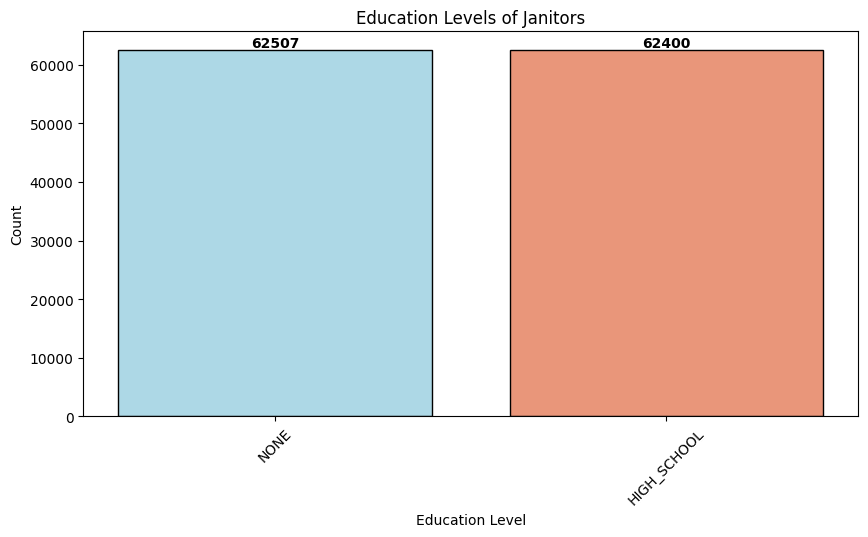

In [ ]:
# Convert PySpark DataFrame to Pandas
janitor_education_pd = merged_df.filter(merged_df["jobrole"] == "JANITOR") \
    .groupBy("education") \
    .count() \
    .orderBy("count", ascending=False) \
    .toPandas()

color = ['lightblue', 'darksalmon']

# Create the bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(janitor_education_pd["education"], janitor_education_pd["count"], color=color, edgecolor='black')

# Add text labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Create bar chart
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Education Levels of Janitors")
plt.xticks(rotation=45)
plt.show()

This code filters 'JANITOR' in jobrole and shows unique values in education.<br>
The highest level of education of janitors are either High School or no education.

In [ ]:
# Group by jobrole = JANITOR and show unique values in major
janitor_major_df = merged_df.filter(merged_df["jobrole"] == "JANITOR") \
    .select("major") \
    .distinct()
janitor_major_df.show()

+-----+
|major|
+-----+
| NONE|
+-----+



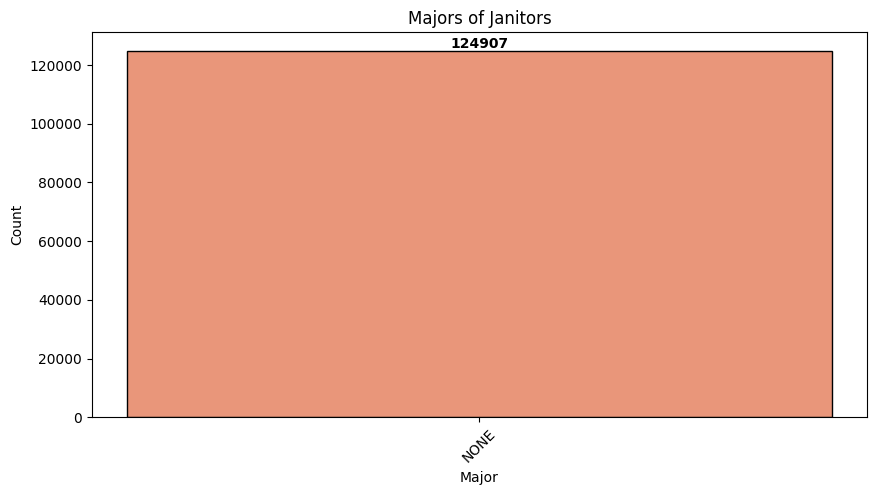

In [ ]:
# Convert PySpark DataFrame to Pandas
janitor_major_pd = merged_df.filter(merged_df["jobrole"] == "JANITOR") \
    .groupBy("major") \
    .count() \
    .orderBy("count", ascending=False) \
    .toPandas()

# Create the bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(janitor_major_pd["major"], janitor_major_pd["count"], color='darksalmon', edgecolor='black')

# Add text labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Create bar chart
plt.xlabel("Major")
plt.ylabel("Count")
plt.title("Majors of Janitors")
plt.xticks(rotation=45)
plt.show()

This code filters 'JANITOR' in jobrole and shows unique values in major.<br>
All janitors did not have any specialization.

In [ ]:
# Group by jobrole = JANITOR and show unique values in industry
janitor_industry_df = merged_df.filter(merged_df["jobrole"] == "JANITOR") \
    .select("industry") \
    .distinct()
print(janitor_industry_df.show())

# Show unique values in industry
print(merged_df.select('industry').distinct().show())

+---------+
| industry|
+---------+
|  SERVICE|
|     AUTO|
|   HEALTH|
|EDUCATION|
|      WEB|
|      OIL|
|  FINANCE|
+---------+

None
+----------+
|  industry|
+----------+
|   SERVICE|
|GOVERNMENT|
|      AUTO|
|    HEALTH|
| EDUCATION|
|       WEB|
|       OIL|
|   FINANCE|
+----------+

None


This code filters 'JANITOR' in jobRole and shows unique values in industry. As well as showing unique values in industry without the filter. So I am able to make the comparison. <br>
The only industry janitors do not work in is the government industry.

In [ ]:
# Filter for Janitors and count occurrences of each unique yearsexperience value
experience_counts = merged_df.filter(merged_df["jobrole"] == "JANITOR") \
    .groupBy("yearsexperience") \
    .count() \
    .orderBy(F.col("yearsexperience").asc())
experience_counts.show(experience_counts.count(), False)

+---------------+-----+
|yearsexperience|count|
+---------------+-----+
|0              |5085 |
|1              |5003 |
|2              |4951 |
|3              |5044 |
|4              |5011 |
|5              |5071 |
|6              |5053 |
|7              |4974 |
|8              |5001 |
|9              |5043 |
|10             |4955 |
|11             |4990 |
|12             |4900 |
|13             |5051 |
|14             |4926 |
|15             |5036 |
|16             |5006 |
|17             |4991 |
|18             |5037 |
|19             |4915 |
|20             |5010 |
|21             |4934 |
|22             |5077 |
|23             |4956 |
|24             |4887 |
+---------------+-----+



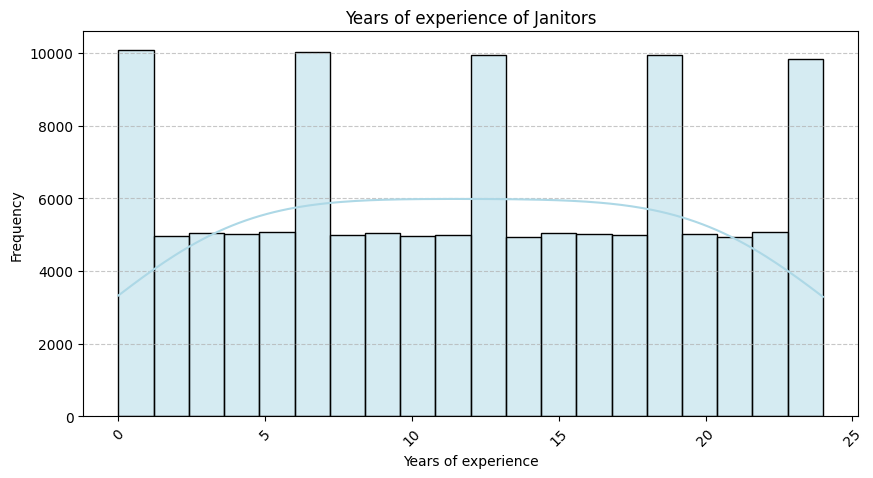

In [ ]:
# Convert to Pandas DataFrame
experience_counts_pd = experience_counts.toPandas()

# Plot histogram using Seaborn
plt.figure(figsize=(10, 5))
sns.histplot(experience_counts_pd, x="yearsexperience", weights="count", bins=20, kde=True, color="lightblue")
plt.xlabel("Years of experience")
plt.ylabel("Frequency")
plt.title("Years of experience of Janitors")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This code filters 'JANITOR' in jobRole, groups unique values of yearsExperience, count how many times each yearsExperience value appears, sorts the output in ascending order of yearsExperience. Results is evenly spread out.

In [ ]:
# Filter for Janitors and count occurrences of each unique distancefromcbd value
distance_counts = merged_df.filter(merged_df["jobrole"] == "JANITOR") \
    .groupBy("distancefromcbd") \
    .count() \
    .orderBy(F.col("distancefromcbd").asc())
distance_counts.show(distance_counts.count(), False)

+---------------+-----+
|distancefromcbd|count|
+---------------+-----+
|0              |1268 |
|1              |1268 |
|2              |1260 |
|3              |1238 |
|4              |1222 |
|5              |1276 |
|6              |1219 |
|7              |1189 |
|8              |1214 |
|9              |1282 |
|10             |1293 |
|11             |1259 |
|12             |1284 |
|13             |1279 |
|14             |1215 |
|15             |1236 |
|16             |1282 |
|17             |1275 |
|18             |1249 |
|19             |1234 |
|20             |1242 |
|21             |1283 |
|22             |1240 |
|23             |1299 |
|24             |1256 |
|25             |1210 |
|26             |1235 |
|27             |1214 |
|28             |1238 |
|29             |1207 |
|30             |1183 |
|31             |1283 |
|32             |1233 |
|33             |1247 |
|34             |1223 |
|35             |1275 |
|36             |1305 |
|37             |1267 |
|38             

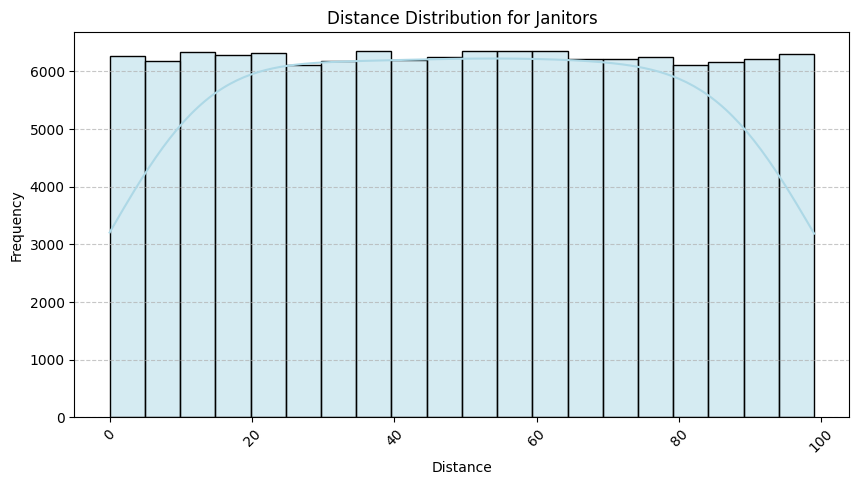

In [ ]:
# Convert to Pandas DataFrame
distance_counts_pd = distance_counts.toPandas()

# Plot histogram using Seaborn
plt.figure(figsize=(10, 5))
sns.histplot(distance_counts_pd, x="distancefromcbd", weights="count", bins=20, kde=True, color="lightblue")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.title("Distance Distribution for Janitors")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This code filters 'JANITOR' in jobRole, groups unique values of distanceFromCBD, count how many times each distanceFromCBD value appears, sorts the output in ascending order of distanceFromCBD. Results is evenly spread out.

In [ ]:
# Filter for Janitors and count occurrences of each unique salaryinthousands value
salary_counts = merged_df.filter(merged_df["jobrole"] == "JANITOR") \
    .groupBy("salaryinthousands") \
    .count() \
    .orderBy(F.col("salaryinthousands").asc())
salary_counts.show(salary_counts.count(), False)

+-----------------+-----+
|salaryinthousands|count|
+-----------------+-----+
|17               |1    |
|18               |3    |
|19               |10   |
|20               |43   |
|21               |49   |
|22               |63   |
|23               |106  |
|24               |129  |
|25               |173  |
|26               |228  |
|27               |306  |
|28               |342  |
|29               |451  |
|30               |505  |
|31               |524  |
|32               |579  |
|33               |700  |
|34               |761  |
|35               |855  |
|36               |989  |
|37               |1005 |
|38               |1054 |
|39               |1189 |
|40               |1233 |
|41               |1362 |
|42               |1407 |
|43               |1457 |
|44               |1542 |
|45               |1587 |
|46               |1729 |
|47               |1730 |
|48               |1719 |
|49               |1815 |
|50               |1762 |
|51               |1917 |
|52         

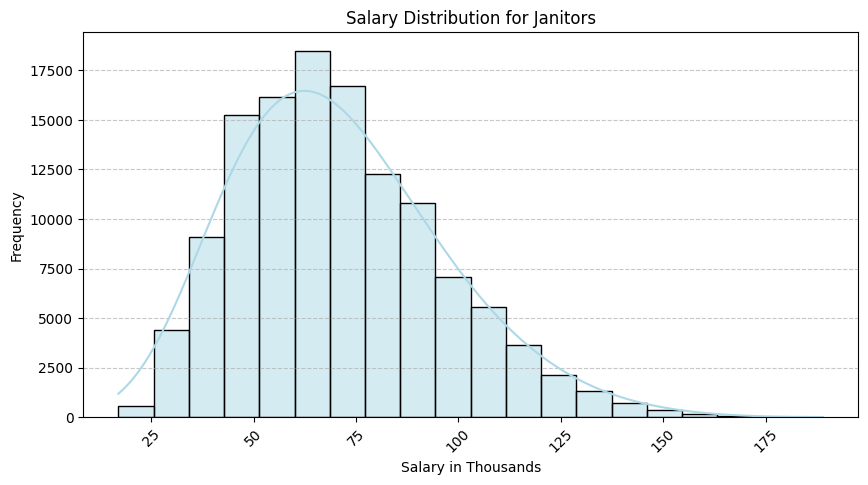

In [ ]:
# Convert to Pandas DataFrame
salary_counts_pd = salary_counts.toPandas()

# Plot histogram using Seaborn
plt.figure(figsize=(10, 5))
sns.histplot(salary_counts_pd, x="salaryinthousands", weights="count", bins=20, kde=True, color="lightblue")
plt.xlabel("Salary in Thousands")
plt.ylabel("Frequency")
plt.title("Salary Distribution for Janitors")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This code filters 'JANITOR' in jobRole, groups unique values of salaryinthousands, count how many times each salaryinthousands value appears, sorts the output in ascending order of salaryinthousands.
Majority of counts appear in between the 45-80 values of salaryinthousands.

The interesting components of job role Janitor are the fact that all janitors have no major, have high school or no education as their highest education level, do not work in government industries, and salary distributions.

## Given that the median salary per year is $98,000

### Which industry has the highest percentage of people who are below the median salary?

In [ ]:
# Total employees per industry
total_per_industry = merged_df.groupBy("industry").count().withColumnRenamed("count", "total_count")

# Employees earning below the median salary
below_median = merged_df.filter(merged_df["salaryinthousands"] < 98) \
    .groupBy("industry") \
    .count() \
    .withColumnRenamed("count", "below_median_count")

# Join both counts
industry_below_median = below_median.join(total_per_industry, "industry")

# Calculate the percentage of employees below median salary
industry_below_median = industry_below_median.withColumn(
    "percentage_below_median",
    round((F.col("below_median_count") / F.col("total_count")) * 100, 2)
)

# Sort by highest percentage
industry_below_median = industry_below_median.orderBy(F.col("percentage_below_median").desc())
industry_below_median.show()

+----------+------------------+-----------+-----------------------+
|  industry|below_median_count|total_count|percentage_below_median|
+----------+------------------+-----------+-----------------------+
|GOVERNMENT|                 1|          1|                  100.0|
| EDUCATION|             70767|     142615|                  49.62|
|   SERVICE|             63005|     142341|                  44.26|
|      AUTO|             55649|     142516|                  39.05|
|    HEALTH|             46670|     142002|                  32.87|
|       WEB|             39741|     141766|                  28.03|
|       OIL|             28906|     140200|                  20.62|
|   FINANCE|             28904|     140453|                  20.58|
+----------+------------------+-----------+-----------------------+



In [ ]:
# Filter industry = GOVERNMENT to get info
government_df = merged_df.filter(merged_df["industry"] == "GOVERNMENT")
government_df.show()

+----------------+---------+---------+---------+-----+----------+---------------+---------------+-----------------+
|           jobid|companyid|  jobrole|education|major|  industry|yearsexperience|distancefromcbd|salaryinthousands|
+----------------+---------+---------+---------+-----+----------+---------------+---------------+-----------------+
|JOB1362685343310|    COMP0|PRESIDENT|     NONE| NONE|GOVERNMENT|              1|              1|               81|
+----------------+---------+---------+---------+-----+----------+---------------+---------------+-----------------+



This code gets the total count of each industry value as well as the total count of each industry value below the specified median salary and joins both columns together. It then calculates the percentage using both count columns.<br>
The government industry should be the answer, however, that industry only has 1 data entry and it being the president, it is possible that additional information is being kept confidential, making it unreasonable to conclude that the government industry is the appropriate answer. <br>
Hence, the education industry would be the industry would that has the highest percentage of people that are below the median salary with 49.58%.

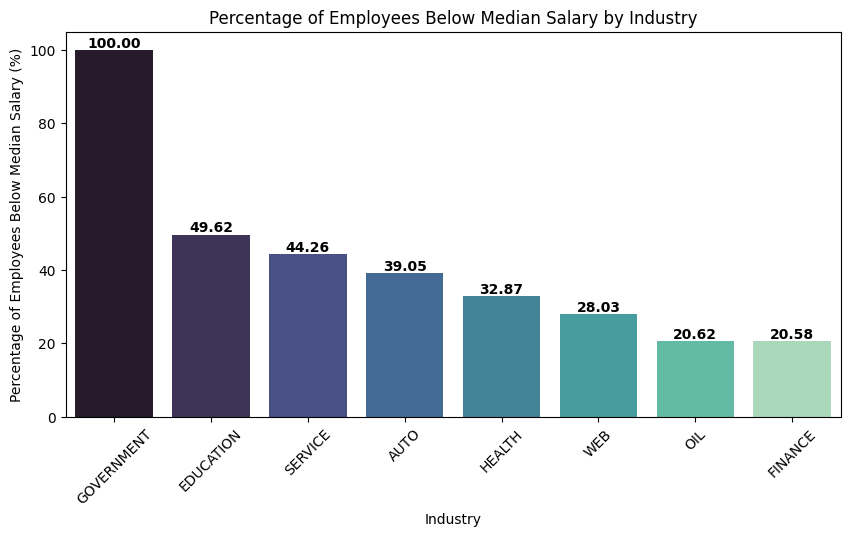

In [ ]:
# Convert PySpark DataFrame to Pandas for easy plotting
industry_below_median_pd = industry_below_median.toPandas()

# Create a bar chart for the percentage of employees below the median salary
plt.figure(figsize=(10, 5))
bars = sns.barplot(data=industry_below_median_pd, x="industry", y="percentage_below_median", palette="mako")

# Add text labels above each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Industry")
plt.ylabel("Percentage of Employees Below Median Salary (%)")
plt.title("Percentage of Employees Below Median Salary by Industry")
plt.xticks(rotation=45)
plt.show()

Graphical visualization of percentage of employees below median salary by industry. The government industry only has 1 data entry.

### What are the job roles that are above the median salary?

In [ ]:
# Group by jobrole and calculate the average salary
roles_above_median = merged_df.groupBy("jobrole") \
    .agg(round(F.avg("salaryinthousands"), 2).alias("avg_salary")) \
    .filter(F.col("avg_salary") > 98) \
    .orderBy(F.col("avg_salary").desc())
roles_above_median.show()

+--------------+----------+
|       jobrole|avg_salary|
+--------------+----------+
|           CEO|     142.8|
|           CTO|    134.23|
|           CFO|    134.19|
|VICE_PRESIDENT|     124.8|
|       MANAGER|    115.15|
|        SENIOR|    105.42|
+--------------+----------+



The code will find the avereage of salaries of each jobRole, it will then filter to include all average salaries that are above 98, and sort it in descending order. I decided to use average as although jobRoles would be named the same, the salary might be different. Average would be a good middleground. <br>
jobRoles 'CEO', 'CTO', 'CFO', 'VICE_PRESIDENT', 'MANAGER', and 'SENIOR' have average salaries above the median salary.

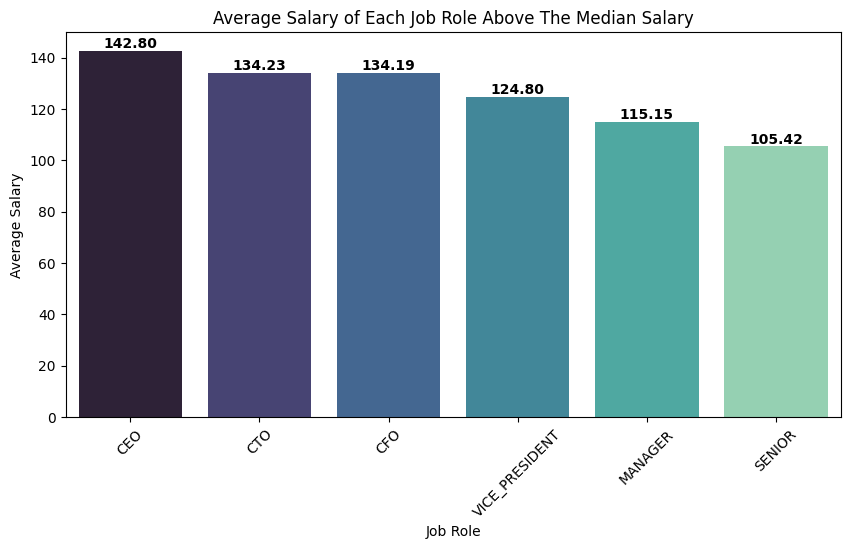

In [ ]:
# Convert PySpark DataFrame to Pandas for easy plotting
roles_above_median_pd = roles_above_median.toPandas()

# Create a bar chart for the average salary of each job role
plt.figure(figsize=(10, 5))
bars = sns.barplot(data=roles_above_median_pd, x="jobrole", y="avg_salary", palette="mako")

# Add text labels above each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Job Role")
plt.ylabel("Average Salary")
plt.title("Average Salary of Each Job Role Above The Median Salary")
plt.xticks(rotation=45)
plt.show()

Graphical visualization of average salary of each job role above the median salary.

## Determine if there is a relationship between job role and salary.

In [ ]:
# Group by jobrole and calculate statistical metrics
job_salary_stats = merged_df.groupBy("jobrole").agg(
    F.round(F.avg("salaryinthousands"), 2).alias("avg_salary"),
    F.round(F.min("salaryinthousands"), 2).alias("min_salary"),
    F.round(F.max("salaryinthousands"), 2).alias("max_salary"),
    F.count("salaryinthousands").alias("count")
).orderBy(F.col("avg_salary").desc())
job_salary_stats.show()

+--------------+----------+----------+----------+------+
|       jobrole|avg_salary|min_salary|max_salary| count|
+--------------+----------+----------+----------+------+
|           CEO|     142.8|        55|       219|121310|
|           CTO|    134.23|        51|       219|123404|
|           CFO|    134.19|        51|       219|122697|
|VICE_PRESIDENT|     124.8|        44|       219|124499|
|       MANAGER|    115.15|        37|       219|124825|
|        SENIOR|    105.42|        31|       219|125758|
|        JUNIOR|     95.31|        23|       219|124493|
|     PRESIDENT|      81.0|        81|        81|     1|
|       JANITOR|     70.81|        17|       189|124907|
+--------------+----------+----------+----------+------+



This code shows information about salary and jobRole, and whether higher job positions (CEO, VP, CFO, etc.) affect salaries. It is seen that the average salary of jobRoles would decrease as the positions lower, with the exception of President as there is only 1 instance of the data, making it unreliable. Hence, suggesting that there is a direct relationship between salary and jobRole.

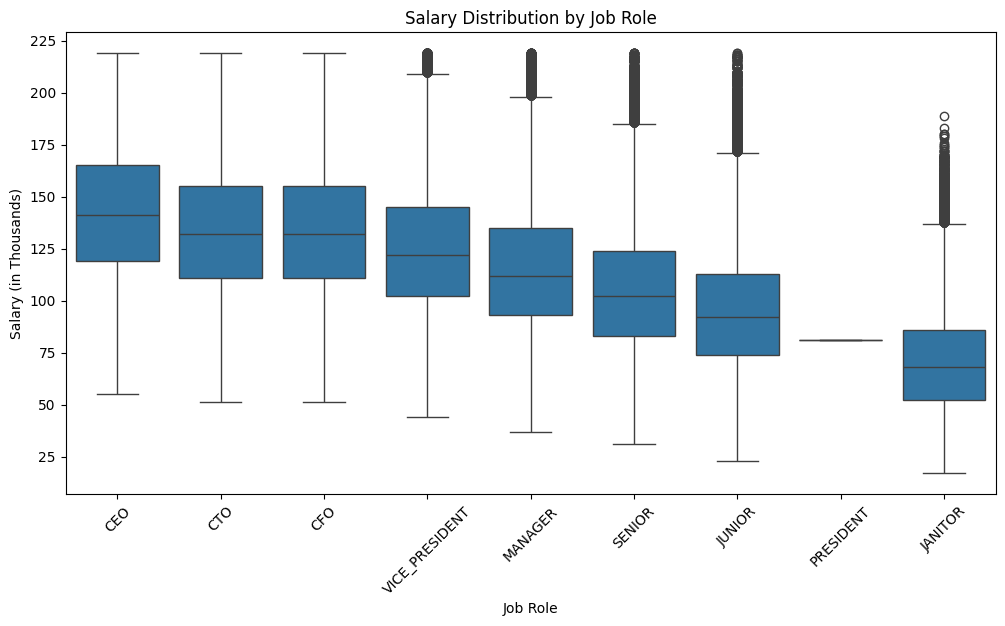

In [ ]:
# Define the custom order for job roles
job_role_order = ["CEO", "CTO", "CFO", "VICE_PRESIDENT", "MANAGER",
                  "SENIOR", "JUNIOR", "PRESIDENT", "JANITOR"]

# Plot a boxplot to show salary distribution per job role
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df.toPandas(), x="jobrole", y="salaryinthousands", order=job_role_order)
plt.xticks(rotation=45)
plt.title("Salary Distribution by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Salary (in Thousands)")
plt.show()

In [ ]:
merged_df.show()

+----------------+---------+--------------+-----------+----------+---------+---------------+---------------+-----------------+
|           jobid|companyid|       jobrole|  education|     major| industry|yearsexperience|distancefromcbd|salaryinthousands|
+----------------+---------+--------------+-----------+----------+---------+---------------+---------------+-----------------+
|JOB1362684407687|   COMP37|           CFO|    MASTERS|      MATH|   HEALTH|             10|             83|              130|
|JOB1362684407688|   COMP19|           CEO|HIGH_SCHOOL|      NONE|      WEB|              3|             73|              101|
|JOB1362684407697|   COMP56|       JANITOR|HIGH_SCHOOL|      NONE|   HEALTH|             24|             30|              102|
|JOB1362684407700|   COMP54|        JUNIOR|    MASTERS|      MATH|  FINANCE|             21|             26|              193|
|JOB1362684407703|   COMP14|        JUNIOR|    MASTERS|   PHYSICS|  SERVICE|              1|             91|   

Graphical visualization that further emphasises that higher jobRoles directly affect salaries, with the exception of president.

## Is there a relationship between distance from CBD and job role?

In [ ]:
# Group by jobrole and calculate statistical metrics
job_distance_stats = merged_df.groupBy("jobrole").agg(
    F.round(F.avg("distancefromcbd"), 2).alias("avg_distance"),
    F.round(F.min("distancefromcbd"), 2).alias("min_distance"),
    F.round(F.max("distancefromcbd"), 4).alias("max_distance"),
    F.count("distancefromcbd").alias("count")
).orderBy(F.col("avg_distance").desc())
job_distance_stats.show()

+--------------+------------+------------+------------+------+
|       jobrole|avg_distance|min_distance|max_distance| count|
+--------------+------------+------------+------------+------+
|           CEO|       50.21|           0|          99|121310|
|           CTO|       49.96|           0|          99|123404|
|           CFO|       49.96|           0|          99|122697|
|        JUNIOR|       49.67|           0|          99|124493|
|VICE_PRESIDENT|        49.6|           0|          99|124499|
|        SENIOR|       49.59|           0|          99|125758|
|       MANAGER|       49.56|           0|          99|124825|
|       JANITOR|       49.44|           0|          99|124907|
|     PRESIDENT|         1.0|           1|           1|     1|
+--------------+------------+------------+------------+------+



This code shows information about distanceFromCBD and jobRole, and whether higher distance values affect what jobRole the individuals are. Based on the average distance, it can be seen that it makes no difference to what the jobRole of the individual is.

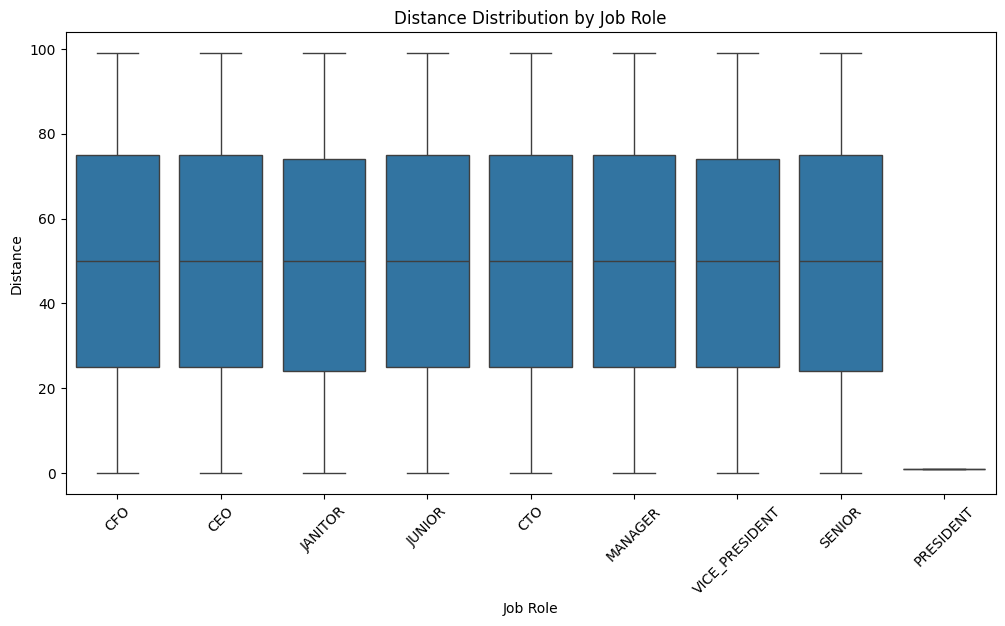

In [ ]:
# Plot a boxplot to show salary distribution per job role
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df.toPandas(), x="jobrole", y="distancefromcbd")
plt.xticks(rotation=45)
plt.title("Distance Distribution by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Distance")
plt.show()

Graphical visualization that further emphasises that jobRoles do not affect distance from CBD and vice versa.

## Does the major they studied affect the salary?

In [ ]:
# Group by major and calculate the average salary
major_salary_df = merged_df.groupBy("major") \
    .agg(round(F.avg("salaryinthousands"), 2).alias("avg_salary")) \
    .orderBy(F.col("avg_salary").desc())
major_salary_df.show(20, truncate=False)  # Show all without truncation


+-----------+----------+
|major      |avg_salary|
+-----------+----------+
|ENGINEERING|135.75    |
|BUSINESS   |133.51    |
|MATH       |131.81    |
|COMPSCI    |130.77    |
|PHYSICS    |129.17    |
|CHEMISTRY  |127.99    |
|BIOLOGY    |126.95    |
|LITERATURE |123.74    |
|NONE       |102.35    |
+-----------+----------+



This code compares the average salary of each major. Majors have a slight affect on the average salary, with engineering majors having the highest average salary and literature majors having the lowest avereage salary. The only significant difference is that individuals with majors have average salaries higher than individuals with no majors.

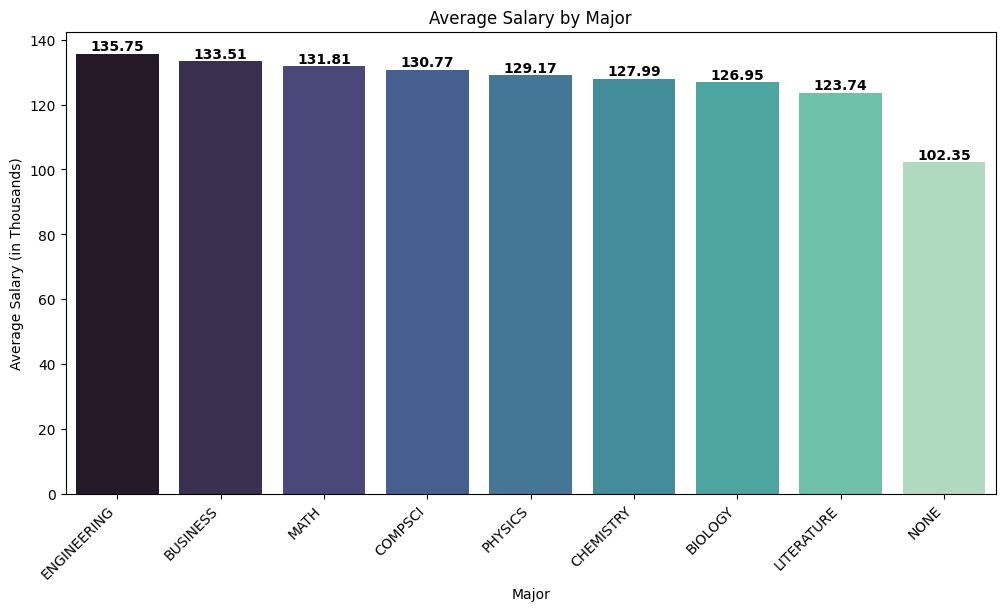

In [ ]:
# Convert PySpark DataFrame to Pandas for visualization
major_salary_pd = major_salary_df.toPandas()

# Create a bar chart for average salary by major
plt.figure(figsize=(12, 6))
bars = sns.barplot(data=major_salary_pd, x="major", y="avg_salary", palette="mako")

# Add text labels above each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45, ha="right")
plt.xlabel("Major")
plt.ylabel("Average Salary (in Thousands)")
plt.title("Average Salary by Major")
plt.show()

Graphical visualization that shows major holders earn more than non-major holders. But average salaries between different majors are not significant.

# Task 3: ML Model Development

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression, RandomForestRegressor, GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

In [ ]:
merged_df.show()

+----------------+---------+--------------+-----------+----------+---------+---------------+---------------+-----------------+
|           jobid|companyid|       jobrole|  education|     major| industry|yearsexperience|distancefromcbd|salaryinthousands|
+----------------+---------+--------------+-----------+----------+---------+---------------+---------------+-----------------+
|JOB1362684407687|   COMP37|           CFO|    MASTERS|      MATH|   HEALTH|             10|             83|              130|
|JOB1362684407688|   COMP19|           CEO|HIGH_SCHOOL|      NONE|      WEB|              3|             73|              101|
|JOB1362684407697|   COMP56|       JANITOR|HIGH_SCHOOL|      NONE|   HEALTH|             24|             30|              102|
|JOB1362684407700|   COMP54|        JUNIOR|    MASTERS|      MATH|  FINANCE|             21|             26|              193|
|JOB1362684407703|   COMP14|        JUNIOR|    MASTERS|   PHYSICS|  SERVICE|              1|             91|   

## Encoding

In [ ]:
# Drop ID columns
merged_df = merged_df.drop("jobid", "companyid")

Dropping ID columns as they do not provide any information.

In [ ]:
# StringIndexer + OneHotEncoder for categorical columns
jobrole_indexer = StringIndexer(inputCol="jobrole", outputCol="jobrole_index")
education_indexer = StringIndexer(inputCol="education", outputCol="education_index")
major_indexer = StringIndexer(inputCol="major", outputCol="major_index")
industry_indexer = StringIndexer(inputCol="industry", outputCol="industry_index")

jobrole_encoder = OneHotEncoder(inputCol="jobrole_index", outputCol="jobrole_ohe")
education_encoder = OneHotEncoder(inputCol="education_index", outputCol="education_ohe")
major_encoder = OneHotEncoder(inputCol="major_index", outputCol="major_ohe")
industry_encoder = OneHotEncoder(inputCol="industry_index", outputCol="industry_ohe")

Transforming categorical columns like jobRole, education, major, and industry into numeric representations. Use StringIndexer to convert each category into a numeric index, then apply OneHotEncoder to convert the indices into one-hot encoded vectors.

In [ ]:
# 2. Use VectorAssembler for numerical columns (for StandardScaler)
scaler_experience_assembler = VectorAssembler(inputCols=["yearsexperience"], outputCol="yearsexperience_vec")
scaler_distance_assembler = VectorAssembler(inputCols=["distancefromcbd"], outputCol="distancefromcbd_vec")

In [ ]:
# StandardScaler for numerical columns
scaler_experience = StandardScaler(inputCol="yearsexperience_vec", outputCol="scaled_yearsexperience")
scaler_distance = StandardScaler(inputCol="distancefromcbd_vec", outputCol="scaled_distancefromcbd")

Scale the numerical features yearsExperience and distanceFromCBD to standardize them

In [ ]:
# Assemble all features into a single vector (except labelCol)
assembler = VectorAssembler(
    inputCols=["jobrole_ohe", "education_ohe", "major_ohe", "industry_ohe", "scaled_yearsexperience", "scaled_distancefromcbd"],
    outputCol="features"
)

Combines all the transformed features into a single column called 'features'.

In [ ]:
# Define the pipeline
pipeline = Pipeline(stages=[
    jobrole_indexer, education_indexer, major_indexer, industry_indexer,
    jobrole_encoder, education_encoder, major_encoder, industry_encoder,
    scaler_experience_assembler, scaler_distance_assembler,
    scaler_experience, scaler_distance, assembler
])

model = pipeline.fit(merged_df)
merged_df = model.transform(merged_df)

# Select relevant columns: features (assembled features) and label (salaryinthousands)
merged_df = merged_df.select("features", F.col("salaryinthousands"))
merged_df.show()

+--------------------+-----------------+
|            features|salaryinthousands|
+--------------------+-----------------+
|(29,[6,11,23,27,2...|              130|
|(29,[7,9,12,24,27...|              101|
|(29,[1,9,12,23,27...|              102|
|(29,[4,11,25,27,2...|              193|
|(29,[4,11,16,22,2...|               47|
|(29,[7,11,13,22,2...|              122|
|(29,[7,11,16,20,2...|               95|
|(29,[4,10,13,23,2...|              105|
|(29,[4,8,12,23,27...|               76|
|(29,[5,11,18,21,2...|              130|
|(29,[1,9,12,25,27...|              101|
|(29,[2,12,23,27,2...|              164|
|(29,[2,8,12,23,27...|              115|
|(29,[3,18,23,27,2...|              183|
|(29,[3,9,12,26,27...|              114|
|(29,[3,11,12,23,2...|              141|
|(29,[2,11,13,24,2...|               91|
|(29,[7,9,12,21,27...|              119|
|(29,[3,11,13,26,2...|              112|
|(29,[2,12,21,27,2...|              116|
+--------------------+-----------------+
only showing top

In [ ]:
# Split data into 80% training and 20% testing
train_data, test_data = merged_df.randomSplit([0.8, 0.2])

Splitting the dataset into train and test data.

## Linear Regression

In [ ]:
# Initialize Model
lr = LinearRegression(featuresCol="features", labelCol="salaryinthousands")

# Train Model
lr_model = lr.fit(train_data)

# Make predictions on the test set
lr_predictions = lr_model.transform(test_data)

In [ ]:
# Show results of predictions
lr_results = lr_predictions.select("salaryinthousands", "prediction")
print("Linear Regression Predictions:")
lr_results.show(truncate=False)

# Model evaluation
rmse_evaluator = RegressionEvaluator(labelCol="salaryinthousands", predictionCol="prediction", metricName="rmse")
lr_rmse = rmse_evaluator.evaluate(lr_predictions)
print(f"Linear Regression Root Mean Square Error (RMSE): {lr_rmse:.4f}")

r2_evaluator = RegressionEvaluator(labelCol="salaryinthousands", predictionCol="prediction", metricName="r2")
lr_r2 = r2_evaluator.evaluate(lr_predictions)
print(f"Linear Regression R² score: {lr_r2:.4f}")

Linear Regression Predictions:
+-----------------+------------------+
|salaryinthousands|prediction        |
+-----------------+------------------+
|50               |73.36785414184347 |
|66               |85.06795535349977 |
|103              |88.96798909071853 |
|115              |108.46815777681236|
|109              |118.21824211985927|
|70               |71.43887108716493 |
|71               |62.56554903564361 |
|57               |59.86497275909365 |
|46               |55.235413427865126|
|50               |50.220057485700906|
|63               |49.06266765289378 |
|42               |42.50412526698672 |
|34               |42.11832865605102 |
|46               |39.80354899043677 |
|51               |39.80354899043677 |
|51               |74.54627778858142 |
|47               |66.83034556986725 |
|68               |64.12976929331728 |
|77               |63.35817607144587 |
|41               |54.484854019924555|
+-----------------+------------------+
only showing top 20 rows

Linear 

Training the Linear Regression model, make predictions on the test set and evaluate based on Root-mean-square deviation and R² score.

## Random Forest Regressor

In [ ]:
# Initialize Model
rf = RandomForestRegressor(featuresCol="features", labelCol="salaryinthousands")

# Train Model
rf_model = rf.fit(train_data)

# Make predictions on the test set
rf_predictions = rf_model.transform(test_data)

In [ ]:
# Show results of prediction
rf_results = rf_predictions.select("salaryinthousands", "prediction")
print("Random Forest Predictions:")
rf_results.show(truncate=False)

# Model evaluation
rmse_evaluator = RegressionEvaluator(labelCol="salaryinthousands", predictionCol="prediction", metricName="rmse")
rf_rmse = rmse_evaluator.evaluate(rf_predictions)
print(f"Random Forest Regressor Root Mean Square Error (RMSE): {rf_rmse:.4f}")

r2_evaluator = RegressionEvaluator(labelCol="salaryinthousands", predictionCol="prediction", metricName="r2")
rf_r2 = r2_evaluator.evaluate(rf_predictions)
print(f"Random Forest Regressor R² score: {rf_r2:.4f}")

Random Forest Predictions:
+-----------------+------------------+
|salaryinthousands|prediction        |
+-----------------+------------------+
|50               |93.82342366325553 |
|66               |96.5335029242679  |
|103              |96.5335029242679  |
|115              |130.87918750658312|
|109              |131.55762972602983|
|70               |93.82342366325553 |
|71               |93.82342366325553 |
|57               |93.82342366325553 |
|46               |92.49676122234163 |
|50               |86.83860098624736 |
|63               |86.83860098624736 |
|42               |86.83860098624736 |
|34               |86.83860098624736 |
|46               |86.83860098624736 |
|51               |86.83860098624736 |
|51               |93.82342366325553 |
|47               |93.82342366325553 |
|68               |93.82342366325553 |
|77               |93.82342366325553 |
|41               |86.83860098624736 |
+-----------------+------------------+
only showing top 20 rows

Random Fore

Training the Random Forest Regression model, make predictions on the test set and evaluate based on Root-mean-square deviation and R² score.

## Gradient-Boosted Tree Regressor

In [ ]:
# Initialize Model
gbt = GBTRegressor(featuresCol="features", labelCol="salaryinthousands")

# Train Model
gbt_model = gbt.fit(train_data)

# Make predictions on the test set
gbt_predictions = gbt_model.transform(test_data)

In [ ]:
# Show results of prediction
gbt_results = gbt_predictions.select("salaryinthousands", "prediction")
print("Gradient-Boosted Trees Predictions:")
rf_results.show(truncate=False)

# Model evaluation
rmse_evaluator = RegressionEvaluator(labelCol="salaryinthousands", predictionCol="prediction", metricName="rmse")
gbt_rmse = rmse_evaluator.evaluate(gbt_predictions)
print(f"Gradient-Boosted Tree Regressor Root Mean Square Error (RMSE): {gbt_rmse:.4f}")

r2_evaluator = RegressionEvaluator(labelCol="salaryinthousands", predictionCol="prediction", metricName="r2")
gbt_r2 = r2_evaluator.evaluate(gbt_predictions)
print(f"Gradient-Boosted Tree Regressor R² score: {gbt_r2:.4f}")

Gradient-Boosted Trees Predictions:
+-----------------+------------------+
|salaryinthousands|prediction        |
+-----------------+------------------+
|50               |93.82342366325553 |
|66               |96.5335029242679  |
|103              |96.5335029242679  |
|115              |130.87918750658312|
|109              |131.55762972602983|
|70               |93.82342366325553 |
|71               |93.82342366325553 |
|57               |93.82342366325553 |
|46               |92.49676122234163 |
|50               |86.83860098624736 |
|63               |86.83860098624736 |
|42               |86.83860098624736 |
|34               |86.83860098624736 |
|46               |86.83860098624736 |
|51               |86.83860098624736 |
|51               |93.82342366325553 |
|47               |93.82342366325553 |
|68               |93.82342366325553 |
|77               |93.82342366325553 |
|41               |86.83860098624736 |
+-----------------+------------------+
only showing top 20 rows

Gr

Training the Gradient-Boosted Trees Regression model, make predictions on the test set and evaluate based on Root-mean-square deviation and R² score.

I trained 3 different models, Linear Regression, Random Forest Regressor, and Gradient-Boosted Tree Regressor. Based on the Root Mean Square Error (RMSE) and R² score, the **linear regression model** is the best model to use for prediction of salary.<br>
Root Mean Square Error (RMSE): 19.1391<br>
R² score: 0.7392<br>
I decided not to do hyperparameter tuning as my RMSE and R² score are quite good. Testing perfect hyperparameters is time consuming because each iteration could take hours and tuning may provide only marginal improvements that do not justify the time spent.<br><br>
RMSE measures the average difference between the actual values and the predicted values in the regression model. A lower RMSE indicates a better model (lower error).<br>
R² (coefficient of determination) measures how well the independent variables explain the variability of the dependent variable. R² value should be as close to 1 as possible, it indicates that the model can explain most of the variability in the data.

# Task 4: Comparison between PySpark and non-PySpark workflow (Continued on another .ipynb file)